<a href="https://colab.research.google.com/github/nurilhaidar/Machine-Learning/blob/main/Mukhammad_Nuril_Haidar_Week09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>TUGAS WEEK 09<h2>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
from sklearn.datasets import fetch_openml

# Memuat dataset MNIST
mnist = fetch_openml("mnist_784", version=1, as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [44]:
X = mnist.data
y = mnist.target.astype(int)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [55]:
from keras.api._v2.keras.layers import Dense
import tensorflow as tf
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=256, activation='relu'))
ann.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [51]:
ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [52]:
ann.fit(X_train, y_train, batch_size = 100, epochs = 10)

Epoch 1/10
560/560 [==============================] - 4s 6ms/step - loss: 0.2509 - accuracy: 0.9293
Epoch 2/10
560/560 [==============================] - 4s 7ms/step - loss: 0.0980 - accuracy: 0.9720
Epoch 3/10
560/560 [==============================] - 4s 7ms/step - loss: 0.0632 - accuracy: 0.9818
Epoch 4/10
560/560 [==============================] - 3s 6ms/step - loss: 0.0423 - accuracy: 0.9876
Epoch 5/10
560/560 [==============================] - 3s 6ms/step - loss: 0.0273 - accuracy: 0.9917
Epoch 6/10
560/560 [==============================] - 4s 8ms/step - loss: 0.0209 - accuracy: 0.9939
Epoch 7/10
560/560 [==============================] - 3s 6ms/step - loss: 0.0173 - accuracy: 0.9953
Epoch 8/10
560/560 [==============================] - 3s 6ms/step - loss: 0.0172 - accuracy: 0.9962
Epoch 9/10
560/560 [==============================] - 4s 7ms/step - loss: 0.0188 - accuracy: 0.9943
Epoch 10/10
560/560 [==============================] - 4s 7ms/step - loss: 0.0165 - accuracy: 0.9954

In [53]:
loss, accuracy  = ann.evaluate(X_test, y_test, verbose=False)
print(f'Akurasi : {accuracy}')

Akurasi : 0.9701428413391113


1/1 [==============================] - 0s 34ms/step


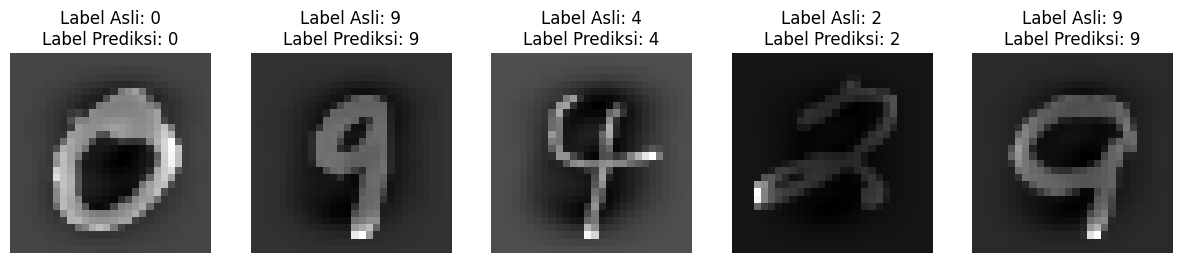

In [54]:
from sklearn.metrics import accuracy_score, classification_report
# Pilih beberapa contoh citra dari data pengujian
num_samples = 5  # Ganti jumlah contoh yang ingin ditampilkan sesuai kebutuhan

# Membuat layout subplot horizontal
fig, axs = plt.subplots(1, num_samples, figsize=(15, 4))

for i in range(num_samples):
    sample_index = np.random.randint(len(X_test))
    sample_image = X_test[sample_index]
    true_label = y_test[sample_index]

    # Prediksi dengan model yang telah disiapkan (model neural network)
    prediction = ann.predict(np.array([sample_image]))

    # Label prediksi adalah indeks dengan nilai maksimum dari output
    predicted_label = np.argmax(prediction)

    # Menampilkan citra pengujian dan hasil prediksi
    axs[i].imshow(np.reshape(sample_image, (28, 28)), cmap='gray')
    axs[i].set_title(f"Label Asli: {true_label}\nLabel Prediksi: {predicted_label}")
    axs[i].axis('off')

plt.show()